<a href="https://colab.research.google.com/github/EmileBinot/spiderino-sensors-model/blob/main/modeling/regression_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


Covariance matrix :
           IR0_cam   IR1_cam   IR2_cam   IR3_cam
IR0_meas  0.114018 -0.944437  0.022174  0.560356
IR1_meas  0.773435 -0.008685 -0.861777  0.154347
IR2_meas -0.875817 -0.039410  0.804293 -0.032913
IR3_meas -0.105552  0.645334  0.179567 -0.807512


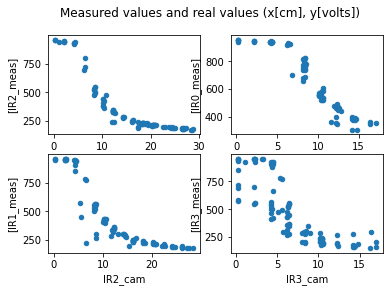

In [2]:
meas_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/merge-1011.csv', sep=",")
corrM = meas_df.corr()
print('Covariance matrix :')
print(corrM.iloc[4::,0:4])

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Measured values and real values (x[cm], y[volts])')
meas_df.plot(ax=axes[0,0],x="IR0_cam", y=["IR2_meas"],kind ="scatter")
meas_df.plot(ax=axes[0,1],x="IR1_cam", y=["IR0_meas"],kind ="scatter")
meas_df.plot(ax=axes[1,0],x="IR2_cam", y=["IR1_meas"],kind ="scatter")
meas_df.plot(ax=axes[1,1],x="IR3_cam", y=["IR3_meas"],kind ="scatter")
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_21 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 144
Trainable params: 141
Non-trainable params: 3
_________________________________________________________________
(79, 1)
(79, 1)


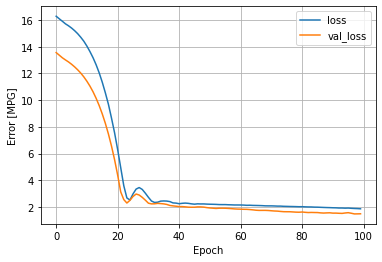

In [22]:
from sklearn.model_selection import train_test_split
x = meas_df[['IR2_meas']].values
y = meas_df[['IR0_cam']].values

# feature is input; label is output

normalizer = tf.keras.layers.Normalization(axis=-1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# normalizer.adapt(np.array(x))

X_normalizer = layers.Normalization(input_shape=[1,], axis=None)
X_normalizer.adapt(x)

model = keras.Sequential([
    X_normalizer,
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(units=1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error')
model.build()
model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

print(X_train.shape)
print(y_train.shape)

1/1 [==============================] - 0s 32ms/step


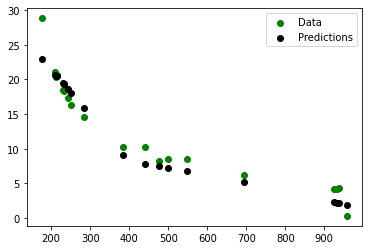

In [24]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

plt.scatter(X_test, y_test,color='g', label='Data') 
plt.scatter(X_test, predict_test,color='k', label='Predictions') 
plt.legend()